
# <div align="center">The Effect of Various Factors on Median Household Income <br> in The United States


Contributors: Mohammed Ahmed, Kevin Wu, Fei Yuan, Mazin Karjikar


## <div align="center">Introduction

Welcome to our data science tutorial! In this tutorial we will be showcasing the data science pipeline. To do that, we have chosen to analyze an interesting topic - factors that correlate with median household/family income (MHI) in the United States!! We have chosen a multitude of factors and analyzed them for how correlated they are with MHI, and we have compared them to each other in terms of predictive power. Some of the factors we have chosen to analyze include diversity, air quality, crime rates, and region of the US. 

The importance of this data ranges from how individuals can increase their income to which factors that create unequal opportunity can be mitigated. Overall, the results can be used for many meaningful purposes and can provide insight for employers, employees, social justice activists, and individuals.

How can we come to such conclusions? By collecting data from multiple sources, we can create datasets that we can analyze for trends. Since our dependent variable is income, we can query a variety of independent variables and use statistical analysis to answer whether or not they have a correlation with income. After that, we can use methods to test for interaction between different factors as well as compare the weight of their effects.

One important note before the tutorial begins is that we are using the power of Python and Jupyter Notebooks to carry out this project. These choices are for a couple reasons - firstly, Python has a plethora of useful data science libraries that are incredibly helpful in manipulating data. Of these some are NumPy and Pandas. There are also statistical analysis libraries at our disposal. Second, Jupyter notebooks provide a very intuitive progression from code to output that we can show to you on our website. There are also markdown cells that allow us to tell a story as we progress through our project - the chronological order makes it much easier to follow along. It also allows for smooth collaborative effort, which in the end allows for a better product from us.

All of the steps in our project are outlined below in detail, we hope you enjoy learning about the power of data science! 

## <div align="center">Data Collection

The first step is to collect a bunch of datasets that pertain to our intended analysis. We are looking for data sets that have observations of any of our factors, and we can use the year to merge them. For example, observations in different data sets that both correspond to the year 2010 can be merged as a single observation. As many of these that we can find, we import, and we extract. 

The data sets are collected from a variaty of governmental agencies, including the Census Bureau, the US Environmental Protection Agency, and the FBI's Uniform Crime Report.

### Imports

First we import all the required library api's.

In [1]:
# Input parsing
import requests
from bs4 import BeautifulSoup
# Data cleaning/manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Statistical models and linear regression
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

Next we request the raw crime dataset directly from the [FBI's UCR website](https://www.fbi.gov/how-we-can-help-you/more-fbi-services-and-information/ucr/publications).

In [2]:
raw1 = pd.DataFrame(columns = ['Metropolitan Statistical Area', 'Counties/principal cities',
       'Population', 'Violent crime', 'Murder',
       'Rape', 'Robbery', 'Aggravated assault', 'Property crime', 'Burglary',
       'Larceny-theft', 'Motor vehicle theft', 'Year'])
# Requests each year's data in a loop
for i in np.arange(2010,2020):
  # Pesky formatting for hyperlinks
  if i == 2016: link = 'https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/tables/table-4'
  elif i > 2016: link = 'https://ucr.fbi.gov/crime-in-the-u.s/'+str(i)+'/crime-in-the-u.s.-'+str(i)+'/topic-pages/tables/table-6'
  elif (i == 2012 or i == 2013): 
    link = 'https://ucr.fbi.gov/crime-in-the-u.s/'+str(i)+'/crime-in-the-u.s.-'+str(i)+'/tables/6tabledatadecpdf/table-6'
  elif i >= 2010: link = 'https://ucr.fbi.gov/crime-in-the-u.s/'+str(i)+'/crime-in-the-u.s.-'+str(i)+'/tables/table-6'
  elif i > 2005: link = 'https://www2.fbi.gov/ucr/cius'+str(i)+'/data/table_06.html'
  elif i == 2005: link = 'https://www2.fbi.gov/ucr/05cius/data/table_06.html'

  # Request the data using appropriate links and parse it to form readable tables
  req = requests.get(link)
  soup = BeautifulSoup(req.content, 'html.parser')
  if i > 2009: id = 'table-data-container'
  else: id = 'datatable'
  snip = soup.find(id = id).prettify
  temp = pd.read_html(str(snip))[0]
  
  # Add this year's data to the overall dataframe
  temp['Year'] = i
  temp.columns = ['Metropolitan Statistical Area', 'Counties/principal cities',
       'Population', 'Violent crime', 'Murder',
       'Rape', 'Robbery', 'Aggravated assault', 'Property crime', 'Burglary',
       'Larceny-theft', 'Motor vehicle theft', 'Year']
  raw1 = pd.concat([raw1, temp])
  print(str(i) + ' request successful')
raw1.head()

2010 request successful
2011 request successful
2012 request successful
2013 request successful
2014 request successful
2015 request successful
2016 request successful
2017 request successful
2018 request successful
2019 request successful


,Metropolitan Statistical Area,Counties/principal cities,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Year
0,"Abilene, TX M.S.A.",NaN,159566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
1,"Abilene, TX M.S.A.","Includes Callahan, Jones, and Taylor Counties",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
2,"Abilene, TX M.S.A.",City of Abilene,116938,578.0,4.0,68.0,112.0,394.0,4897.0,1340.0,3375.0,182.0,2010
3,"Abilene, TX M.S.A.",Total area actually reporting,100.0%,675.0,5.0,78.0,116.0,476.0,5772.0,1610.0,3925.0,237.0,2010
4,"Abilene, TX M.S.A.","Rate per 100,000 inhabitants",NaN,423.0,3.1,48.9,72.7,298.3,3617.3,1009.0,2459.8,148.5,2010


The dataset contains a great number of formatting issues and unneeded information, which are removed to best serve the purpose of our study.

In [3]:
# Refining raw data by dropping unnecessary columns and rows
crates = raw1.copy().loc[raw1['Counties/principal cities'] == 'Rate per 100,000 inhabitants',]
crates = crates.drop(['Population', 'Counties/principal cities'], axis = 1)
# Use regex to remove formatting problems with metropolitan area's names
crates['Metropolitan Statistical Area'] = crates['Metropolitan Statistical Area'].replace(r' (\S\.)*(\S)?(\d)?(,( )?\d)*?$', '', regex = True)
crates.head()

,Metropolitan Statistical Area,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Year
4,"Abilene, TX",423.0,3.1,48.9,72.7,298.3,3617.3,1009.0,2459.8,148.5,2010
10,"Akron, OH",304.7,3.7,40.9,105.1,155.0,3185.6,947.7,2074.5,163.3,2010
16,"Albany, GA",566.0,8.7,24.9,150.4,382.1,4512.6,1417.8,2803.4,291.4,2010
23,"Albany-Schenectady-Troy, NY",310.4,1.5,21.0,98.5,189.4,2693.6,512.1,2076.2,105.4,2010
28,"Albuquerque, NM",670.4,5.8,44.8,124.3,495.6,3896.1,920.6,2586.2,389.4,2010


The resulting dataframe conatains various crime rates for a variety of US metropolitan statistical areas for each year between 2010 to 2019. Each column are recorded in count per 100,000 citizens.

After this, we request the air quality data from the [US Environmental Protection Agency](https://www.epa.gov/air-trends/air-quality-cities-and-counties). 

In [4]:
# Request the data from EPA's website, cleaning up the format along the way
raw2 = pd.read_excel('https://www.epa.gov/system/files/documents/2022-05/airqualitytrendsbycity1990-2021.xlsx')
raw2.columns = pd.concat([raw2.iloc[2,:5], raw2.iloc[2,5:].astype(int)])
raw2 = raw2.iloc[3:858,:]
raw2.index = np.arange(1,len(raw2)+1)
temp = raw2.loc[1,'Core Based Statistical Area']
for i, j in zip(raw2['Core Based Statistical Area'], raw2.index):
  if not pd.isnull(i): temp = i
  else: raw2.loc[j,'Core Based Statistical Area'] = temp
raw2.head()

2,CBSA,Core Based Statistical Area,Pollutant,Trend Statistic,Number of Trend Sites,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,10100,"Aberdeen, SD",PM2.5,Weighted Annual Mean,1,NaN,NaN,NaN,NaN,NaN,...,7.500,7.300,6.20,6.200,5.40,5.900,6.700,5.900,5.900,5.900
2,10100,"Aberdeen, SD",PM2.5,98th Percentile,1,NaN,NaN,NaN,NaN,NaN,...,23.000,22.000,17.00,14.000,14.00,13.000,22.000,18.000,18.000,18.000
3,10420,"Akron, OH",O3,4th Max,2,0.09,0.101,0.087,0.093,0.086,...,0.072,0.059,0.06,0.065,0.06,0.066,0.068,0.062,0.063,0.067
4,10420,"Akron, OH",PM2.5,Weighted Annual Mean,3,NaN,NaN,NaN,NaN,NaN,...,10.000,9.700,9.90,10.400,8.20,7.900,7.900,8.200,8.000,8.300
5,10420,"Akron, OH",PM2.5,98th Percentile,3,NaN,NaN,NaN,NaN,NaN,...,19.000,24.000,22.00,23.000,17.00,18.000,18.000,21.000,21.000,20.000


This dataset is particularly messy - years of observations are stored in columns and some variables are stored in rows. We need to employ tidy data techniques such as melting and pivoting to clean up this data.

In [5]:
# Tidy data + refining & trimming
# Melt the dataframe to get the years onto the rows
temp2 = pd.melt(raw2, id_vars = ['CBSA', 'Core Based Statistical Area', 'Pollutant', 'Trend Statistic', 'Number of Trend Sites'],
                      value_vars = raw2.columns[5:], var_name = 'Year')
temp2 = temp2.loc[((temp2.Pollutant == 'PM2.5') | (temp2.Pollutant == 'O3')) & ((temp2['Trend Statistic'] == 'Weighted Annual Mean') 
                  | (temp2['Trend Statistic'] == '4th Max'))].drop('Trend Statistic', axis = 1)

# Pivot the dataframe to get the key values onto the columns
temp2 = pd.pivot_table(temp2, values = 'value', index = [temp2.index, 'CBSA', 'Core Based Statistical Area', 'Year'], columns = 'Pollutant', aggfunc=np.sum)
temp2 = temp2.reset_index().drop('level_0', axis = 1)
temp2.columns = ['CBSA', 'Core Based Statistical Area', 'Year', 'O3 4th Maximum', 'PM2.5 Weighted Annual Mean']
aggfun = {'CBSA':'first', 'PM2.5 Weighted Annual Mean':'sum', 'O3 4th Maximum':'sum'}
temp2 = temp2.sort_values(by = ['Core Based Statistical Area', 'Year']).groupby([temp2['Core Based Statistical Area'], temp2.Year]).aggregate(aggfun)
# Clean up the index and rename all the columns
temp2 = temp2.reset_index()
temp2.columns = ['Metropolitan Statistical Area', 'Year', 'CBSA', 'PM2.5 Weighted Annual Mean', 'O3 4th Maximum']
temp2['O3 4th Maximum'].replace(0,np.nan,inplace=True)
temp2['PM2.5 Weighted Annual Mean'].replace(0,np.nan,inplace=True)
temp2 = temp2[['Metropolitan Statistical Area', 'CBSA', 'Year', 'PM2.5 Weighted Annual Mean', 'O3 4th Maximum']]

airQuality = temp2.loc[temp2.Year >= 2010,:]
airQuality.head()

,Metropolitan Statistical Area,CBSA,Year,PM2.5 Weighted Annual Mean,O3 4th Maximum
20,"Aberdeen, SD",10100,2010,8.7,NaN
21,"Aberdeen, SD",10100,2011,7.1,NaN
22,"Aberdeen, SD",10100,2012,7.5,NaN
23,"Aberdeen, SD",10100,2013,7.3,NaN
24,"Aberdeen, SD",10100,2014,6.2,NaN


The dataset on the [Census Bureau](https://data.census.gov/table?q=income&g=010XX00US$3100000&d=ACS+1-Year+Estimates+Subject+Tables&tid=ACSST1Y2021.S1903) are individually downloaded and loaded into the notebook. The data is then formatted and cleaned up.

In [6]:
income = pd.DataFrame(columns=['Metropolitan Statistical Area','Year','Total Household Income', 'Total Family Income',
                               'Median Household Income', 'Median Family Income'])
# Load in each dataset
for i in np.arange(2010,2020):
  file = pd.ExcelFile('MIncomeData'+str(i)+'.xlsx')
  formatting_gimmick = ('Total' if i<2017 else 'Number')
  rawcd = pd.read_excel(file, 'Data')
  # Select needed columns, separating the table in two temporarily
  rawT = rawcd.loc[(rawcd.loc[:,'Unnamed: 0'] == 'Households') | (rawcd.loc[:,'Unnamed: 0'] == 'Families'), rawcd.loc[0,:] == formatting_gimmick]
  rawM = rawcd.loc[(rawcd.loc[:,'Unnamed: 0'] == 'Households') | (rawcd.loc[:,'Unnamed: 0'] == 'Families'), rawcd.loc[0,:] == 'Median income (dollars)']
  rawM.columns = rawT.columns
  # Transpose the two tables so they make sense
  rawT = rawT.transpose()
  rawT.columns = ['Total Household Income', 'Total Family Income']
  rawM = rawM.transpose()
  rawM.columns = ['Median Household Income', 'Median Family Income']
  # Adjust the individual index and column names and merge the two dataframes back together
  rawT['Metropolitan Statistical Area'] = rawT.index
  rawT['Year'] = i
  rawT = rawT[['Metropolitan Statistical Area','Year','Total Household Income', 'Total Family Income']]
  rawT['Metropolitan Statistical Area'] = rawT['Metropolitan Statistical Area'].replace(r'( Micro Area)|( Metro Area)$', '', regex=True)
  rawM['Metropolitan Statistical Area'] = rawT['Metropolitan Statistical Area']
  # Append the year's data to the overall dataframe
  income = pd.concat([income, pd.merge(rawT, rawM, how='inner', on='Metropolitan Statistical Area')])
  print(str(i) + ' successful')
income[['Total Household Income', 'Total Family Income', 
        'Median Household Income', 'Median Family Income']] = income[
            ['Total Household Income', 'Total Family Income', 
             'Median Household Income', 'Median Family Income']].replace(r',', '', 
                                                                     regex=True).astype(int)
income

2010 successful
2011 successful
2012 successful
2013 successful
2014 successful
2015 successful
2016 successful
2017 successful
2018 successful
2019 successful


,Metropolitan Statistical Area,Year,Total Household Income,Total Family Income,Median Household Income,Median Family Income
0,"Aberdeen, WA",2010,28376,17908,40019,51049
1,"Abilene, TX",2010,59857,39268,40630,51699
2,"Adrian, MI",2010,36341,24732,45563,53171
3,"Aguadilla-Isabela-San Sebasti?n, PR",2010,108256,81161,14313,17127
4,"Akron, OH",2010,281523,177924,46521,60607
...,...,...,...,...,...,...
513,"York-Hanover, PA",2019,175441,118266,69172,83957
514,"Youngstown-Warren-Boardman, OH-PA",2019,230643,140456,48558,61285
515,"Yuba City, CA",2019,59866,42275,61307,68244
516,"Yuma, AZ",2019,74042,53639,46419,51480


Next, we process the [demographic data](https://data.census.gov/table?q=Race+and+Ethnicity&g=010XX00US$3100000&d=ACS+1-Year+Estimates+Data+Profiles&tid=ACSDP1Y2019.DP05) in much of the same way.

In [7]:
demoPercent = pd.DataFrame(columns=['Metropolitan Statistical Area','Year','Total Population','Hispanic','White', 
                             'Black','Native American','Asian','Pacific Islander','Other','Mixed'])
# Load the data in a loop
for i in np.arange(2010,2020):
  file = pd.ExcelFile('DemoData'+str(i)+'.xlsx')
  rawcd = pd.read_excel(file, 'Data')
  # Remove unneeded columns and rows
  msa = rawcd.loc[0,(rawcd.loc[0,:]=='Estimate')|(rawcd.loc[0,:]=='Label')]
  rawP = rawcd.loc[:,(rawcd.loc[0,:]=='Percent')|(rawcd.loc[0,:]=='Label')]
  rawP = rawP.loc[rawP.index[rawP['Unnamed: 0']==
        'HISPANIC OR LATINO AND RACE'][0]:,:].loc[(rawP['Unnamed: 0']=='Total population')|
                                                  (rawP['Unnamed: 0']=='Hispanic or Latino (of any race)')|
                                                  (rawP['Unnamed: 0']=='White alone')|
                                                  (rawP['Unnamed: 0']=='Black or African American alone')|
                                                  (rawP['Unnamed: 0']=='American Indian and Alaska Native alone')|
                                                  (rawP['Unnamed: 0']=='Asian alone')|
                                                  (rawP['Unnamed: 0']=='Native Hawaiian and Other Pacific Islander alone')|
                                                  (rawP['Unnamed: 0']=='Some other race alone')|
                                                  (rawP['Unnamed: 0']=='Two or more races')]
  # Transpose the dataframe
  rawP = rawP.transpose()
  # Rename the columns and names so they make sense
  rawP.columns = ['Total Population', 'Hispanic', 'White', 'Black', 'Native American', 'Asian', 'Pacific Islander', 'Other', 'Mixed']
  rawP['Metropolitan Statistical Area'] = msa.index
  rawP['Year'] = i
  rawP = rawP[['Metropolitan Statistical Area','Year','Total Population', 'Hispanic', 'White', 'Black', 'Native American', 'Asian', 'Pacific Islander', 'Other', 'Mixed']]
  rawP['Metropolitan Statistical Area'] = rawP['Metropolitan Statistical Area'].replace(r'( Micro Area)|( Metro Area)$', '', regex=True)
  rawP.index = np.arange(1,len(rawP)+1)
  rawP = rawP.iloc[1:,:]
  demoPercent = pd.concat([demoPercent, rawP])
  print(str(i) + ' successful')
# Use regex to remove any formatting problems
demoPercent[['Total Population','Hispanic','White','Black','Native American','Asian','Pacific Islander','Other','Mixed']] = demoPercent[
            ['Total Population','Hispanic','White','Black','Native American','Asian','Pacific Islander','Other','Mixed']].replace(r'N', np.nan, regex=True)
demoPercent = demoPercent.fillna(0)
demoPercent[['Total Population','Hispanic','White','Black','Native American','Asian','Pacific Islander','Other','Mixed']] = demoPercent[
            ['Total Population','Hispanic','White','Black','Asian','Native American','Pacific Islander','Other','Mixed']].replace(r',|%', '', regex=True)
# Turn each numerical data into actual floating points
demoPercent[['Total Population']] = demoPercent[['Total Population']].astype(int)
demoPercent[['Hispanic','White','Black','Native American','Asian','Pacific Islander','Other','Mixed']] = demoPercent[
            ['Hispanic','White','Black','Asian','Native American','Pacific Islander','Other','Mixed']].astype(float)/100
demoPercent.index = np.arange(1,len(demoPercent)+1)
display(demoPercent.head())

2010 successful
2011 successful
2012 successful
2013 successful
2014 successful
2015 successful
2016 successful
2017 successful
2018 successful
2019 successful


,Metropolitan Statistical Area,Year,Total Population,Hispanic,White,Black,Native American,Asian,Pacific Islander,Other,Mixed
1,"Aberdeen, WA",2010,72882,0.087,0.814,0.010,0.037,0.018,0.001,0.000,0.033
2,"Abilene, TX",2010,164941,0.213,0.679,0.071,0.003,0.010,0.000,0.003,0.020
3,"Adrian, MI",2010,99763,0.076,0.871,0.020,0.005,0.004,0.000,0.004,0.020
4,"Aguadilla-Isabela-San Sebasti?n, PR",2010,305988,0.973,0.024,0.001,0.000,0.000,0.000,0.001,0.002
5,"Akron, OH",2010,702951,0.015,0.823,0.116,0.001,0.019,0.000,0.002,0.023


In [8]:
demoPercent['Minority'] = demoPercent['Hispanic'] + demoPercent['Black'] + demoPercent['Native American'] + demoPercent['Asian'] + demoPercent['Pacific Islander'] + demoPercent['Other'] + demoPercent['Mixed']

Finally, we can merge the datasets together to form one large dataset.


In [9]:
# Current collective dataset
data = pd.merge(airQuality, crates, how = 'inner', on = ['Metropolitan Statistical Area', 'Year'])
data = pd.merge(data, income, how = 'inner', on = ['Metropolitan Statistical Area', 'Year'])
data = pd.merge(data, demoPercent, how = 'inner', on = ['Metropolitan Statistical Area', 'Year'])
data.index = np.arange(1,len(data)+1)
data['Year'] = data['Year'].astype(int)
data.head()

,Metropolitan Statistical Area,CBSA,Year,PM2.5 Weighted Annual Mean,O3 4th Maximum,Violent crime,Murder,Rape,Robbery,Aggravated assault,...,Total Population,Hispanic,White,Black,Native American,Asian,Pacific Islander,Other,Mixed,Minority
1,"Akron, OH",10420,2010,12.4,0.074,304.7,3.7,40.9,105.1,155.0,...,702951,0.015,0.823,0.116,0.001,0.019,0.0,0.002,0.023,0.176
2,"Akron, OH",10420,2011,11.1,0.073,324.1,4.7,37.1,127.9,154.5,...,701456,0.016,0.820,0.116,0.002,0.021,0.0,0.001,0.022,0.178
3,"Akron, OH",10420,2012,10.0,0.072,317.5,3.8,39.6,104.4,169.7,...,702262,0.017,0.818,0.116,0.001,0.021,0.0,0.001,0.026,0.182
4,"Akron, OH",10420,2013,9.7,0.059,297.2,5.1,38.4,98.8,154.9,...,705686,0.018,0.814,0.119,0.002,0.023,0.0,0.001,0.023,0.186
5,"Akron, OH",10420,2014,9.9,0.060,275.1,4.8,44.3,79.4,146.6,...,703825,0.019,0.811,0.121,0.002,0.026,0.0,0.001,0.021,0.190


To better analyze regional data, we’ll group the metropolitan regions together into several categories. These will be North East, South Atlantic, Central South, Mid West, Mountain West, and West Coast.

In [10]:

ne = ['CT','MA','NH','VT','ME','RI','NY','NJ','PA']
sa = ['MD','DE','DC','WV','VA','NC','SC','GA','FL']
cs = ['KY','TN','AL','MS','LA','AR','OK','TX']
nc = ['MI','OH','IN','WI','IL','MN','IA','MO','ND','SD','NE','KS']
mw = ['MT','WY','ID','NV','UT','CO','AZ','NM']
wc = ['WA','OR','CA']
def match_region (state):
  match state:
    case state if state in ne: return 'North East'
    case state if state in sa: return 'South Atlantic'
    case state if state in cs: return 'Central South'
    case state if state in nc: return 'MidWest'
    case state if state in mw: return 'Mountain West'
    case state if state in wc: return 'West Coast'
    case _: return 'External'

In [11]:
data['State'] = data['Metropolitan Statistical Area'].str.extract(r'([A-Z]{2})')[0]
data['Region'] = data.State.apply(match_region)
col = data.pop('Region')
data.insert(0, col.name, col)
col = data.pop('State')
data.insert(0, col.name, col)
col = data.pop('CBSA')
data.insert(0, col.name, col)
col = data.pop('Metropolitan Statistical Area')
data.insert(0, col.name, col)
data

,Metropolitan Statistical Area,CBSA,State,Region,Year,PM2.5 Weighted Annual Mean,O3 4th Maximum,Violent crime,Murder,Rape,...,Total Population,Hispanic,White,Black,Native American,Asian,Pacific Islander,Other,Mixed,Minority
1,"Akron, OH",10420,OH,MidWest,2010,12.4,0.074,304.7,3.7,40.9,...,702951,0.015,0.823,0.116,0.001,0.019,0.000,0.002,0.023,0.176
2,"Akron, OH",10420,OH,MidWest,2011,11.1,0.073,324.1,4.7,37.1,...,701456,0.016,0.820,0.116,0.002,0.021,0.000,0.001,0.022,0.178
3,"Akron, OH",10420,OH,MidWest,2012,10.0,0.072,317.5,3.8,39.6,...,702262,0.017,0.818,0.116,0.001,0.021,0.000,0.001,0.026,0.182
4,"Akron, OH",10420,OH,MidWest,2013,9.7,0.059,297.2,5.1,38.4,...,705686,0.018,0.814,0.119,0.002,0.023,0.000,0.001,0.023,0.186
5,"Akron, OH",10420,OH,MidWest,2014,9.9,0.060,275.1,4.8,44.3,...,703825,0.019,0.811,0.121,0.002,0.026,0.000,0.001,0.021,0.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,"Yuba City, CA",49700,CA,West Coast,2015,9.6,0.064,371.6,3.5,37.0,...,170955,0.291,0.510,0.020,0.004,0.122,0.002,0.000,0.050,0.489
1796,"Yuba City, CA",49700,CA,West Coast,2016,8.1,0.063,397.5,7.6,29.3,...,171926,0.293,0.507,0.023,0.007,0.107,0.010,0.004,0.049,0.493
1797,"Yuba City, CA",49700,CA,West Coast,2017,9.3,0.067,386.6,2.3,31.9,...,173679,0.298,0.497,0.030,0.012,0.119,0.004,0.003,0.036,0.502
1798,"Yuba City, CA",49700,CA,West Coast,2018,10.3,0.065,386.0,4.6,47.3,...,174848,0.303,0.493,0.023,0.010,0.111,0.014,0.002,0.045,0.508


Here is a violin plot of distributions of median family income per unique city in the US for each year.

<Axes: xlabel='Year', ylabel='Median Family Income'>

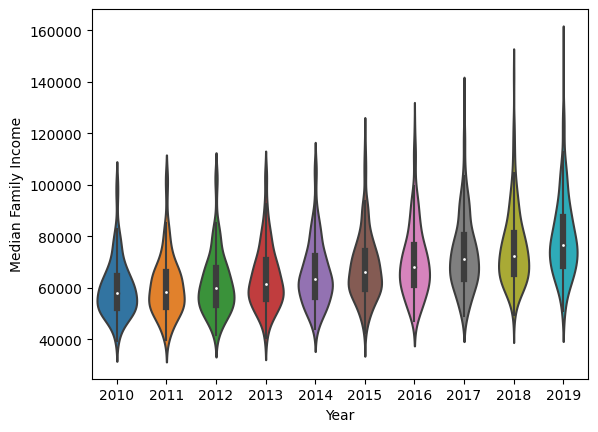

In [12]:
sns.violinplot(data=data, x='Year', y='Median Family Income')

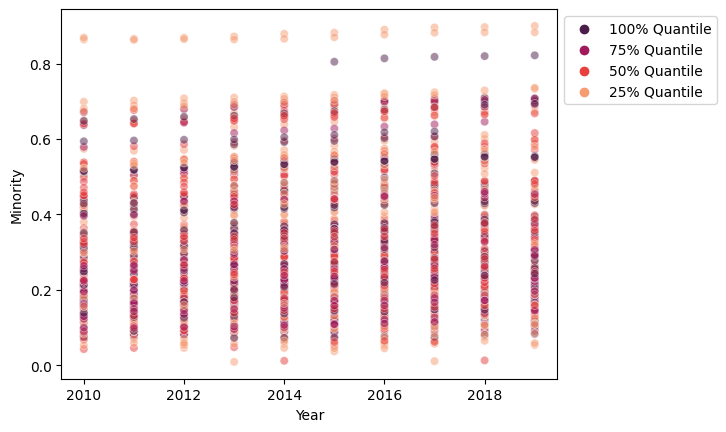

In [13]:
temp = data[['Year', 'Minority', 'Median Family Income']]
for i in temp.Year.unique():
  first=temp.loc[temp.Year==i, 'Median Family Income'].quantile(0.25)
  second=temp.loc[temp.Year==i, 'Median Family Income'].quantile(0.5)
  third=temp.loc[temp.Year==i, 'Median Family Income'].quantile(0.75)
  fourth=temp.loc[temp.Year==i, 'Median Family Income'].quantile(1)

  temp.loc[temp.Year==i, 'Median Family Income'] = pd.cut(temp.loc[temp.Year==i, 'Median Family Income'], bins=[0,first,second,third,fourth],
                    labels=['25% Quantile','50% Quantile','75% Quantile','100% Quantile'])
sns.scatterplot(x=temp['Year'], y=temp['Minority'],
                palette='rocket', alpha=0.5, hue=temp['Median Family Income'], hue_order=['100% Quantile','75% Quantile','50% Quantile','25% Quantile'])
plt.legend(bbox_to_anchor=(1,1))

Here is Minority Composition plotted against Median Family Income.

Text(0.5, 1.08, 'Minority Composition vs Median Family Income for Each Year from 2010 to 2019')

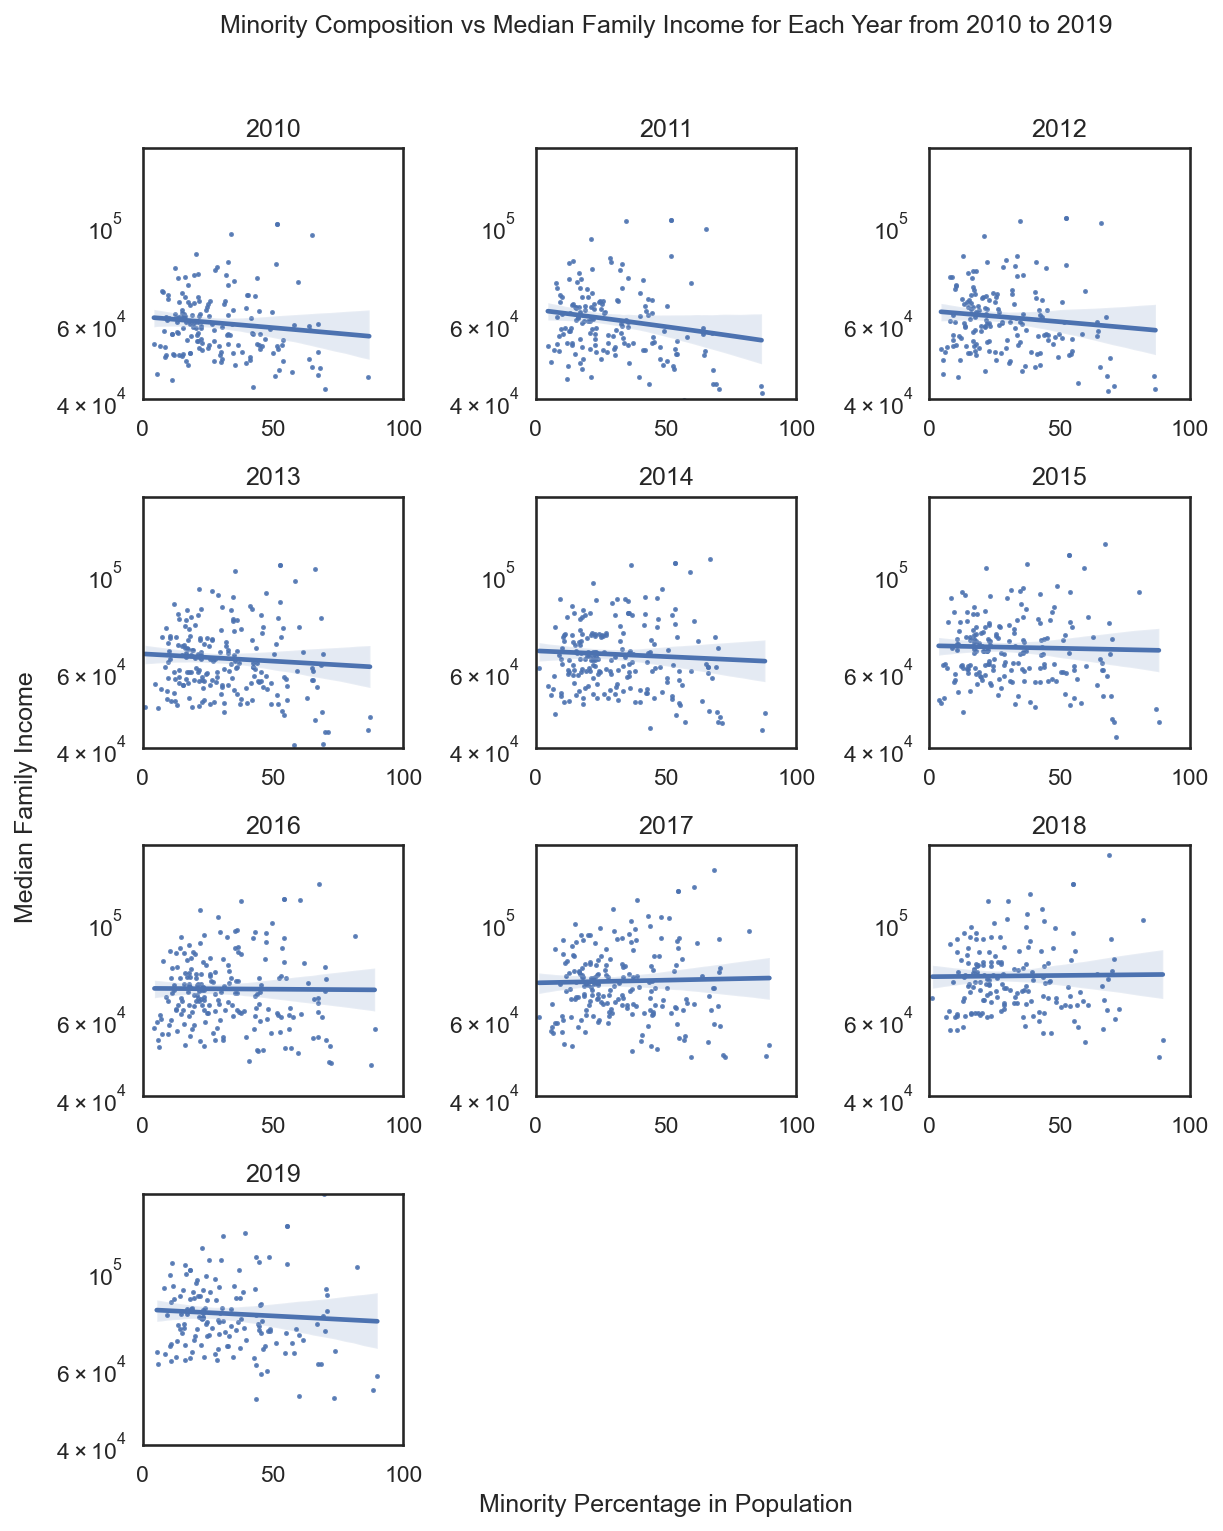

In [14]:
sns.set_theme(style="white")
fig = plt.figure(dpi=150,figsize=(9,10))

for i,j in zip(data.Year.unique(), np.arange(0,10)):
  ax=fig.add_subplot(4,3,j+1)
  rdata = data.loc[data['Year']==i,:]
  sns.regplot(x=rdata['Minority']*100, y=rdata["Median Family Income"], scatter_kws={'s':2})
  ax.set_title(i)
  ax.set_xlabel('')
  ax.set_ylabel('')
  plt.ylim([40000,150000])
  plt.xlim([0,100])
  plt.yscale('log')
  #ax.set_xticks(np.arange(2010, 2019, 4))
axx=fig.add_subplot(1,1,1,frameon=False)
plt.tick_params(labelcolor='none',top=False,bottom=False,left=False,right=False)
plt.grid(False)
plt.ylabel('Median Family Income')
axx.yaxis.set_label_coords(-0.1,0.5)
plt.xlabel('Minority Percentage in Population')
fig.tight_layout()
axx.set_title('Minority Composition vs Median Family Income for Each Year from 2010 to 2019', y=1.08)


## Data Visualization

Air Quality Data Visualization

These are linear regressions fitted onto air quality vs median household income. 

The difference over the years is interesting to look at! It seems as if the linear model slopes get progressively smaller as time passes. This could be due to technological advance, air quality policies, and other factors. 

However, although these observations seem intuitive looking at the data, we must perform hypothesis testing to arrive at any concrete claim with confidence. These tests will be carried out in the next section, however the graphs and their slopes and intercepts are shown below. 

In the following intercepts, 'x' represents every $10,000 increase in Median Household Income
2010: -0.47236481340296216x + 12.261661734643216
2011: -0.49144855935995674x + 12.256135517826973
2012: -0.31804215686658255x + 10.687091081603977
2013: -0.3115770290290573x + 10.494672684498704
2014: -0.42188158713236995x + 11.06931965352663
2015: -0.30006403214226757x + 9.986927993847608
2016: -0.29232762489477154x + 9.301485542845437
2017: -0.2837748182114318x + 9.684910956167386
2018: -0.2737148077026672x + 9.769685152100315
2019: -0.28556288436322014x + 9.17423356353537


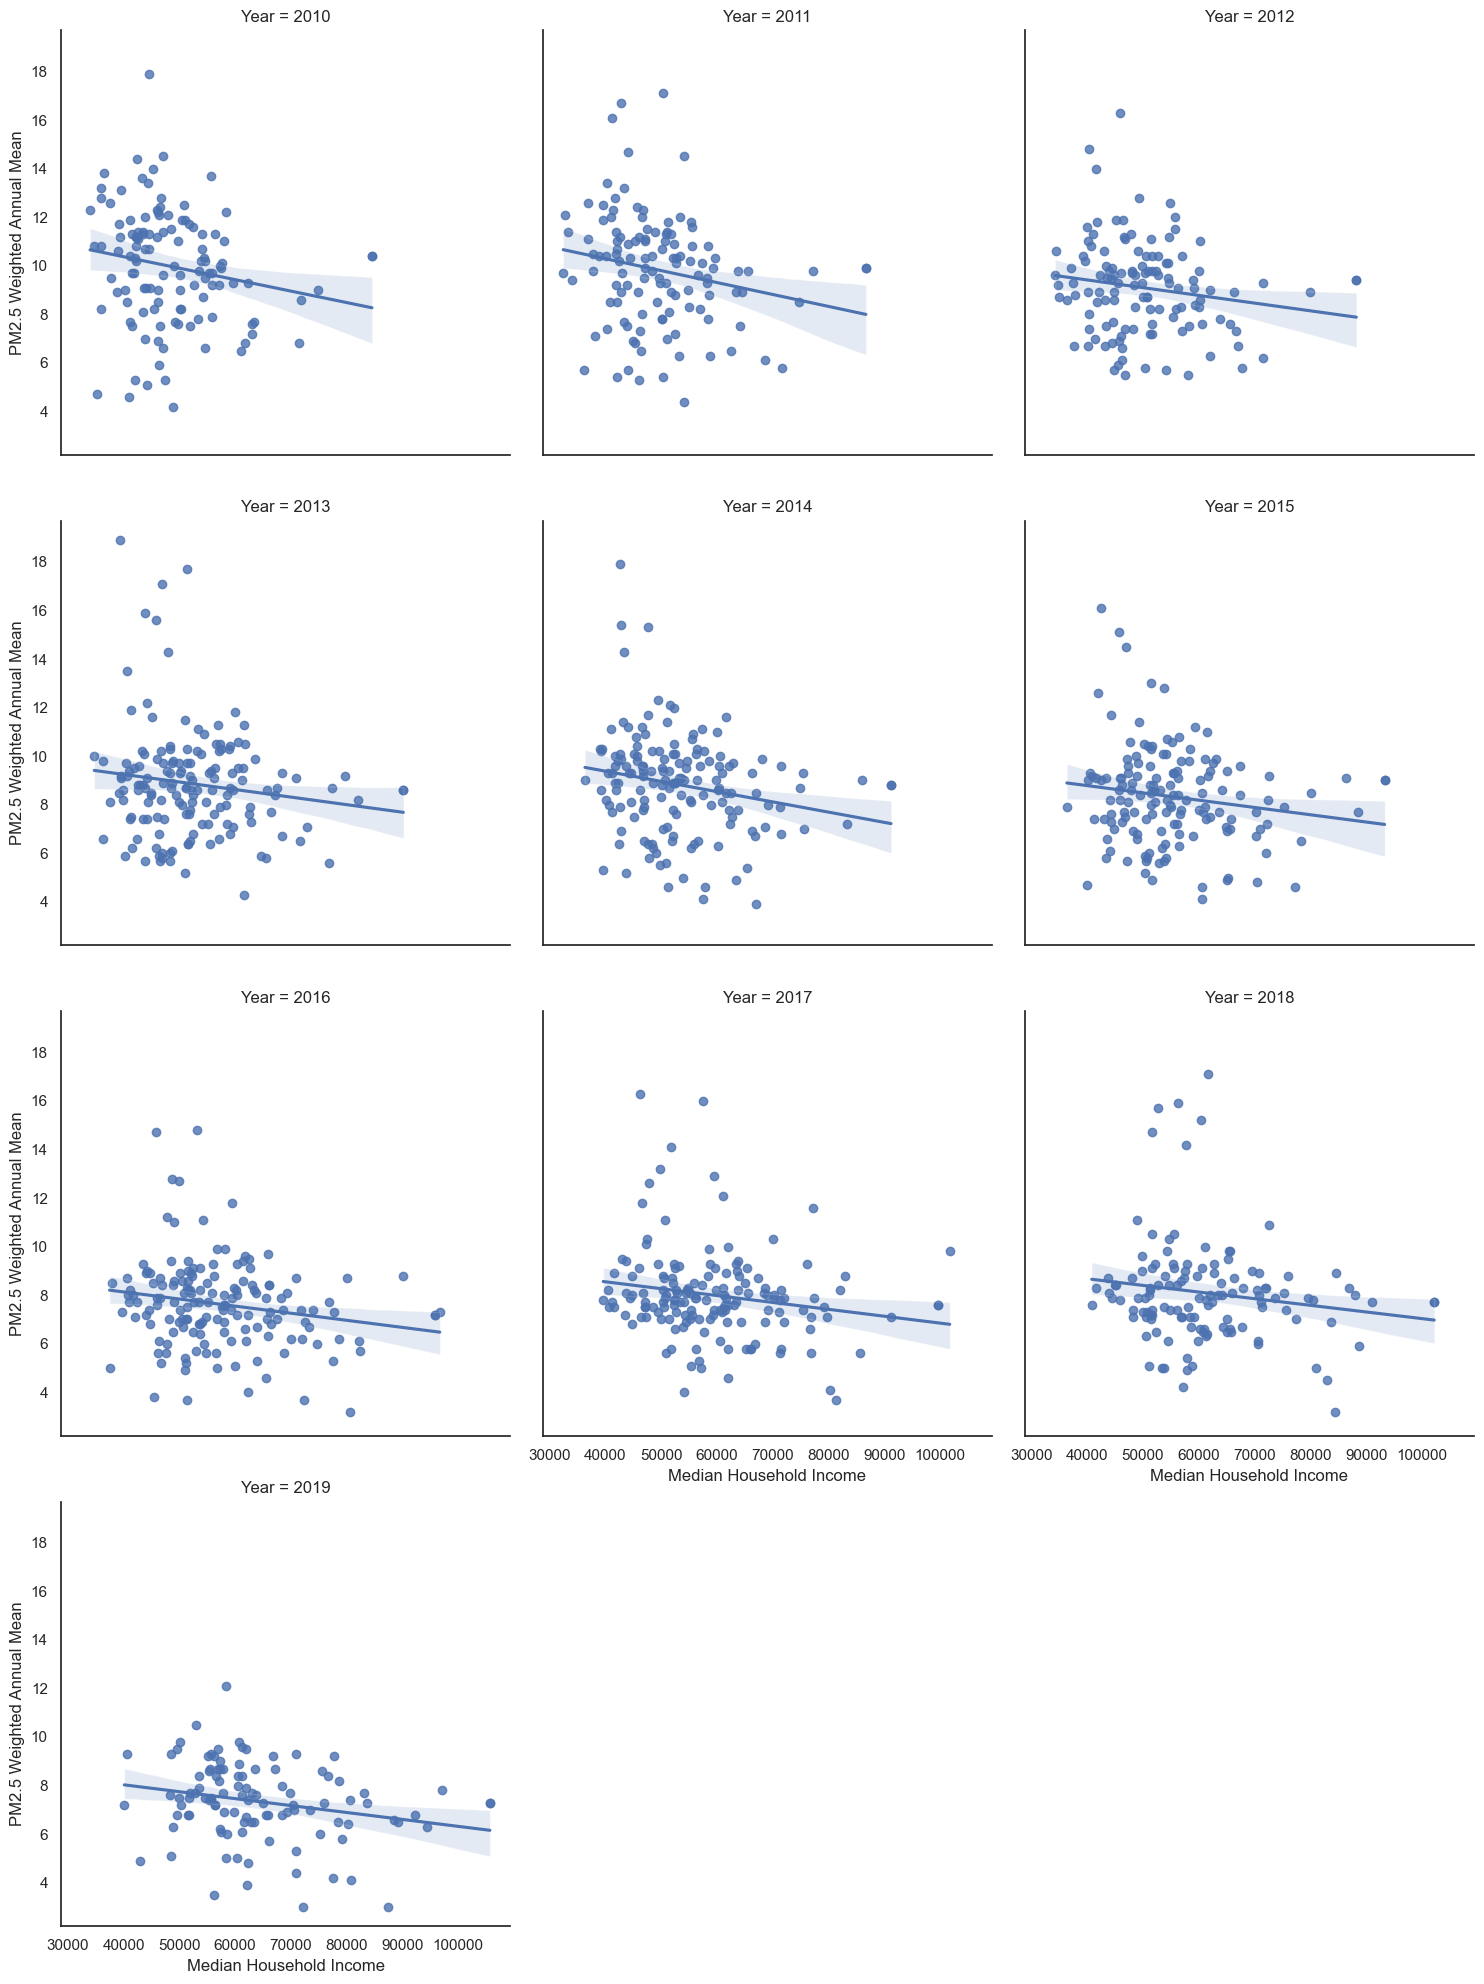

In [15]:
data.dropna(subset=['PM2.5 Weighted Annual Mean'], inplace=True)
data2010 = data.loc[data['Year'] == 2010, :]
data2011 = data.loc[data['Year'] == 2011, :]
data2012 = data.loc[data['Year'] == 2012, :]
data2013 = data.loc[data['Year'] == 2013, :]
data2014 = data.loc[data['Year'] == 2014, :]
data2015 = data.loc[data['Year'] == 2015, :]
data2016 = data.loc[data['Year'] == 2016, :]
data2017 = data.loc[data['Year'] == 2017, :]
data2018 = data.loc[data['Year'] == 2018, :]
data2019 = data.loc[data['Year'] == 2019, :]
years = [data2010, data2011, data2012, data2013, data2014, data2015, data2016, data2017, data2018, data2019]
# Multiple Plots that fit a linear regression to the data grouped by year
grid = sns.lmplot(x="Median Household Income", y="PM2.5 Weighted Annual Mean", col="Year", data=data, col_wrap=3)

print("In the following intercepts, 'x' represents every $10,000 increase in Median Household Income")
# Extract the linear model params for each plot
for i, year in enumerate(years):
  y = year['PM2.5 Weighted Annual Mean']
  x = sm.add_constant(year['Median Household Income'])
  model = sm.OLS(y, x).fit()
  slope, intercept = model.params[1], model.params[0]
  print("201" + str(i) + ": " + str(slope*10000)+'x + ' + str(intercept))

Diversity Data Visualization

Simple barplot that outlines general distribution of ethnicity across all of US over time

Basic regression over time of median family income for each general US regions

Text(0.5, 1.08, 'Time vs Median Family Income in Various US Regions')

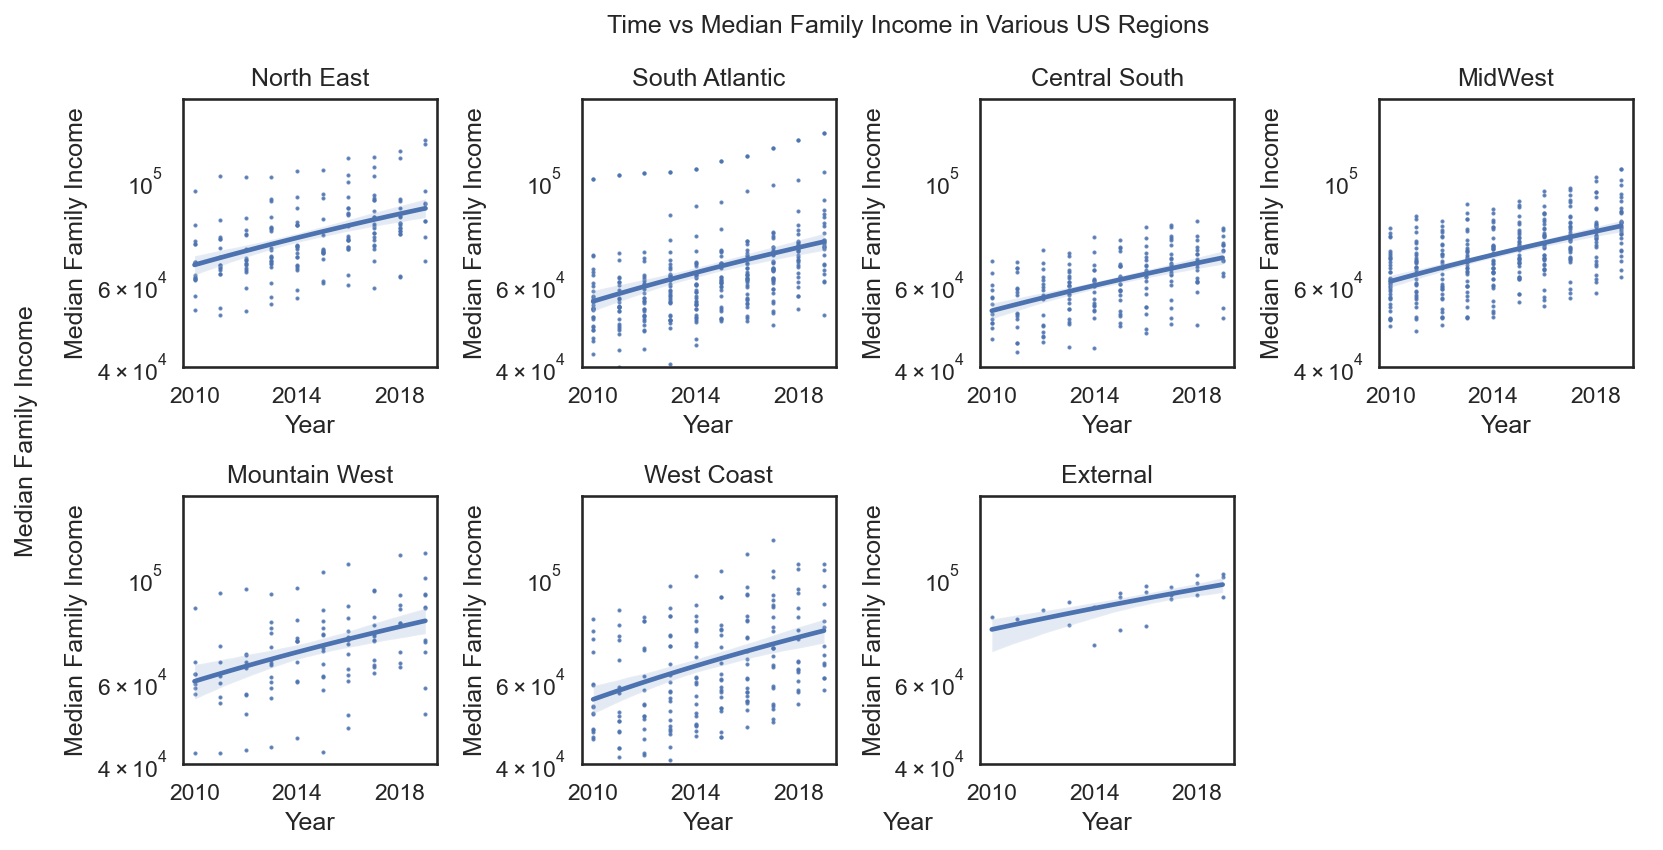

In [16]:
sns.set_theme(style="white")
fig = plt.figure(dpi=150,figsize=(12,6))
regions = ['North East','South Atlantic',
  'Central South','MidWest','Mountain West','West Coast','External']
for i in np.arange(0,7):
  ax=fig.add_subplot(2,4,i+1)
  rdata = data.loc[data['Region']==regions[i],:]
  sns.regplot(x=rdata['Year'], y=rdata["Median Family Income"], scatter_kws={'s':1})
  ax.set_title(regions[i])
  plt.ylim([40000,150000])
  plt.yscale('log')
  ax.set_xticks(np.arange(2010, 2019, 4))
axx=fig.add_subplot(1,1,1,frameon=False)
plt.tick_params(labelcolor='none',top=False,bottom=False,left=False,right=False)
plt.grid(False)
plt.ylabel('Median Family Income')
axx.yaxis.set_label_coords(-0.1,0.5)
plt.xlabel('Year')
fig.tight_layout()
axx.set_title('Time vs Median Family Income in Various US Regions', y=1.08)


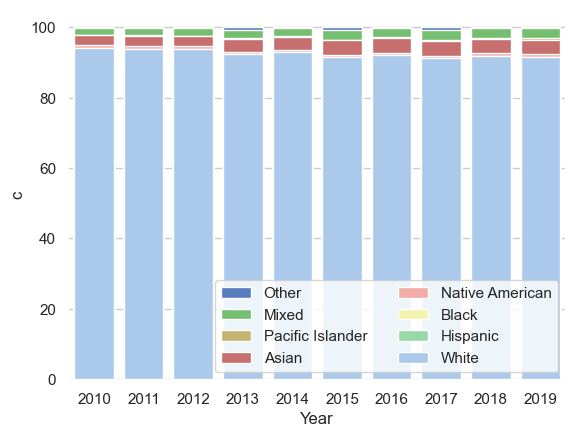

In [17]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots()
dem = pd.DataFrame()
dem['Year'] = data['Year']
dem['a'] = data['White'] * 100
dem['b'] = dem['a'] + data['Hispanic'] * 100
dem['c'] = dem['b'] + data['Black'] * 100
dem['d'] = dem['c'] + data['Native American'] * 100
dem['e'] = dem['d'] + data['Asian'] * 100
dem['f'] = dem['e'] + data['Pacific Islander'] * 100
dem['g'] = dem['f'] + data['Mixed'] * 100
dem['h'] = 100

sns.set_color_codes("muted")
ax.set_ylabel('Percentage')
sns.barplot(x="Year", y="h", data=dem,
            label="Other", color="b", errorbar=None)
sns.barplot(x="Year", y="g", data=dem,
            label="Mixed", color="g", errorbar=None)
sns.barplot(x="Year", y="f", data=dem,
            label="Pacific Islander", color="y", errorbar=None)
sns.barplot(x="Year", y="e", data=dem,
            label="Asian", color="r", errorbar=None)
sns.set_color_codes("pastel")
sns.barplot(x="Year", y="d", data=dem,
            label="Native American", color="r", errorbar=None)
sns.barplot(x="Year", y="c", data=dem,
            label="Black", color="y", errorbar=None)
sns.barplot(x="Year", y="b", data=dem,
            label="Hispanic", color="g", errorbar=None)
sns.barplot(x="Year", y="c", data=dem,
            label="White", color="b", errorbar=None)
ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)


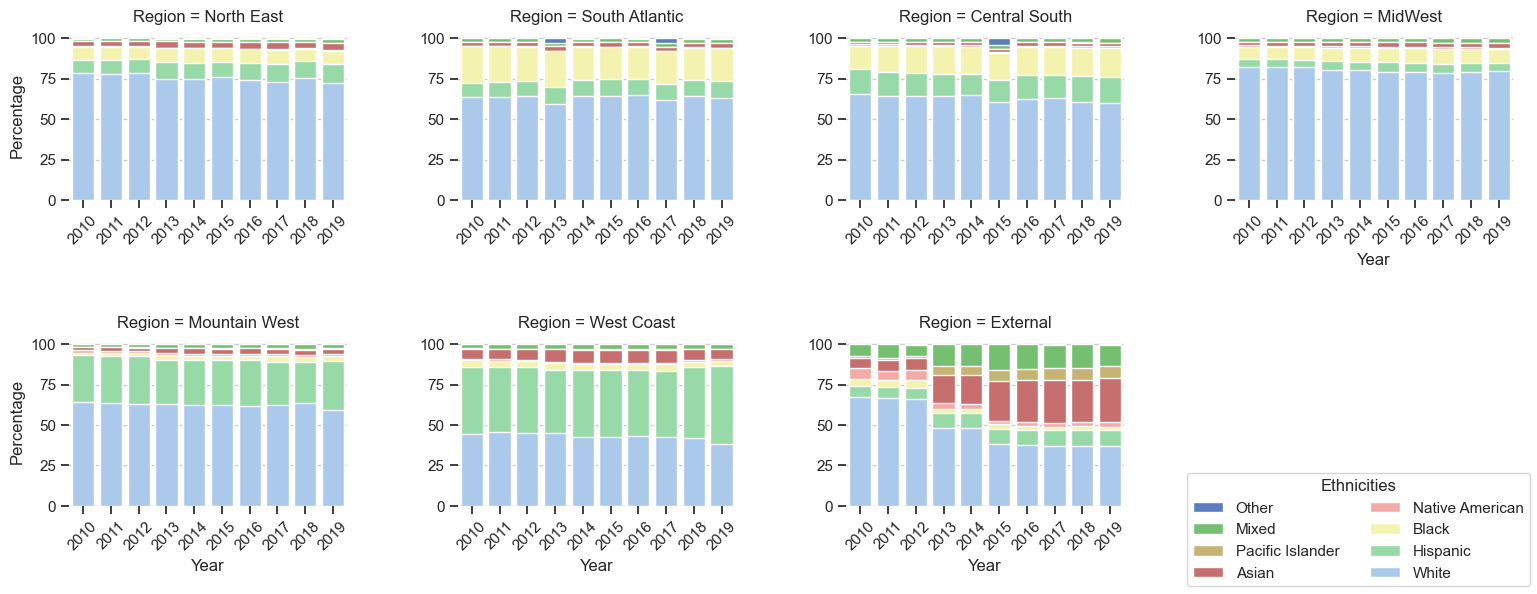

In [18]:
sns.set_theme(style="whitegrid")
dem = pd.DataFrame()
dem['Year'] = data['Year']
dem['Region'] = data['Region']
dem['a'] = data['White'] * 100
dem['b'] = dem['a'] + data['Hispanic'] * 100
dem['c'] = dem['b'] + data['Black'] * 100
dem['d'] = dem['c'] + data['Native American'] * 100
dem['e'] = dem['d'] + data['Asian'] * 100
dem['f'] = dem['e'] + data['Pacific Islander'] * 100
dem['g'] = dem['f'] + data['Mixed'] * 100
dem['h'] = 100

sns.set_color_codes("muted")
g = sns.FacetGrid(dem, col="Region", col_order=['North East','South Atlantic',
  'Central South','MidWest','Mountain West','West Coast','External'] , col_wrap=4)

g.map_dataframe(sns.barplot, x="Year", y="h",
            label="Other", color="b", errorbar=None)
g.map_dataframe(sns.barplot, x="Year", y="g",
            label="Mixed", color="g", errorbar=None)
g.map_dataframe(sns.barplot, x="Year", y="f",
            label="Pacific Islander", color="y", errorbar=None)
g.map_dataframe(sns.barplot, x="Year", y="e",
            label="Asian", color="r", errorbar=None)
sns.set_color_codes("pastel")
g.map_dataframe(sns.barplot, x="Year", y="d",
            label="Native American", color="r", errorbar=None)
g.map_dataframe(sns.barplot, x="Year", y="c",
            label="Black", color="y", errorbar=None)
g.map_dataframe(sns.barplot, x="Year", y="b",
            label="Hispanic", color="g", errorbar=None)
g.map_dataframe(sns.barplot, x="Year", y="a",
            label="White", color="b", errorbar=None)
g.add_legend(ncol=2, loc="lower right", title='Ethnicities', frameon=True)
for axis in g.axes.flat:
    axis.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
g.set_axis_labels("Year", "Percentage")
g.set_xticklabels(rotation=45)
g.despine(left=True, bottom=True)
plt.tight_layout()
plt.subplots_adjust(hspace=0.8, wspace=0.4)

In [19]:
newData = data[['Metropolitan Statistical Area', 'Region', 'Year', 
               'Total Household Income', 'Total Family Income',
       'Median Household Income', 'Median Family Income', 'Total Population',
       'Hispanic', 'White', 'Black', 'Native American', 'Asian',
       'Pacific Islander', 'Other', 'Mixed', 'Minority']].copy()
newData.columns = ['MSA', 'Region', 'Year', 'THI', 'TFI', 'MHI', 'MFI', 'TP',
       'H', 'W', 'B', 'NA', 'A', 'PI', 'Other', 'M', 'Minority']
#newData['Year'] = (newData['Year'] - 2010).astype(float)/10
newData['Year'] = newData['Year'].astype(int)
train = newData.sample(frac=0.5, replace=True,axis = 0)
test = newData.sample(frac=0.5, replace=True,axis = 0)
formula = "MFI ~ Year"
reg = smf.ols(formula=formula, data=train).fit()
pred = reg.params[0] + test['Year']*reg.params[1]
print('Squared error of MFI vs Year model: ' + str(((test['MFI'] - pred)**2).sum()))
print('R-squared score of the model: ' + str(reg.rsquared))
formula = "MFI ~ Year + M"
reg = smf.ols(formula=formula, data=train).fit()
pred = reg.params[0] + test['Year']*reg.params[1] + test['M']*reg.params[2]
print('Squared error of MFI vs Year + Minority Percentage model: ' + str(((test['MFI'] - pred)**2).sum()))
print('R-squared score of the model: ' + str(reg.rsquared))
formula = "MFI ~ Year : M"
reg = smf.ols(formula=formula, data=train).fit()
pred = reg.params[0] + test['Year']*reg.params[1]*test['M']
print('Squared error of MFI vs Year * Minority Percentage model: ' + str(((test['MFI'] - pred)**2).sum()))
print('R-squared score of the model: ' + str(reg.rsquared))
formula = "MFI ~ Year : Region"
reg = smf.ols(formula=formula, data=train).fit()
regions = ['Central South', 'External', 'MidWest', 'Mountain West', 
          'North East', 'South Atlantic', 'West Coast']
err = 0
for i in np.arange(0,7):
  pred = reg.params[0] + test.loc[test.Region==regions[i], 'Year']*reg.params[i+1]
  err = err + ((test.loc[test.Region==regions[i], 'MFI'] - pred)**2).sum()
print('Squared error of MFI vs Year * Region model: ' + str(err))
print('R-squared score of the model: ' + str(reg.rsquared))
reg.summary()

Squared error of MFI vs Year model: 111972017753.64716
R-squared score of the model: 0.16278364974040893
Squared error of MFI vs Year + Minority Percentage model: 107950491945.99756
R-squared score of the model: 0.21155618599325698
Squared error of MFI vs Year * Minority Percentage model: 128125703185.86981
R-squared score of the model: 0.0745596883593822
Squared error of MFI vs Year * Region model: 96032488070.29774
R-squared score of the model: 0.27825555575687966


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MFI   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     36.90
Date:                Fri, 12 May 2023   Prob (F-statistic):           9.43e-44
Time:                        18:19:43   Log-Likelihood:                -7330.8
No. Observations:                 678   AIC:                         1.468e+04
Df Residuals:                     670   BIC:                         1.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -4.247e+06   3.38e+05    -12.548      0.000   -4.91e+06   -3.58e+06
Year:Region[Central South]   2138.3629    168.002     12.728      0.000    1808.489    2468.237
Year:Region[External]        2151.8685    167.963     12.812      0.000    1822.071    2481.666
Year:Region[MidWest]         2143.0790    168.058     12.752      0.000    1813.094    2473.064
Year:Region[Mountain West]   2141.8250    168.051     12.745      0.000    1811.854    2471.796
Year:Region[North East]      2145.2498    168.048     12.766      0.000    1815.286    2475.213
Year:Region[South Atlantic]  2140.4800    168.018     12.740      0.000    1810.575    2470.385
Year:Region[West Coast]      2140.9239    167.967     12.746      0.000    1811.120    2470.728
==============================================================================
Omnibus:                      150.706   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.016
Skew:                           1.160   Prob(JB):                     6.66e-79
Kurtosis:                       5.714   Cond. No.                     7.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Index(['Metropolitan Statistical Area', 'CBSA', 'State', 'Region', 'Year',
       'PM2.5 Weighted Annual Mean', 'O3 4th Maximum', 'Violent crime',
       'Murder', 'Rape', 'Robbery', 'Aggravated assault', 'Property crime',
       'Burglary', 'Larceny-theft', 'Motor vehicle theft',
       'Total Household Income', 'Total Family Income',
       'Median Household Income', 'Median Family Income', 'Total Population',
       'Hispanic', 'White', 'Black', 'Native American', 'Asian',
       'Pacific Islander', 'Other', 'Mixed', 'Minority'],
      dtype='object')

Text(0.5, 1.08, 'Median Family Income vs Various Crime')

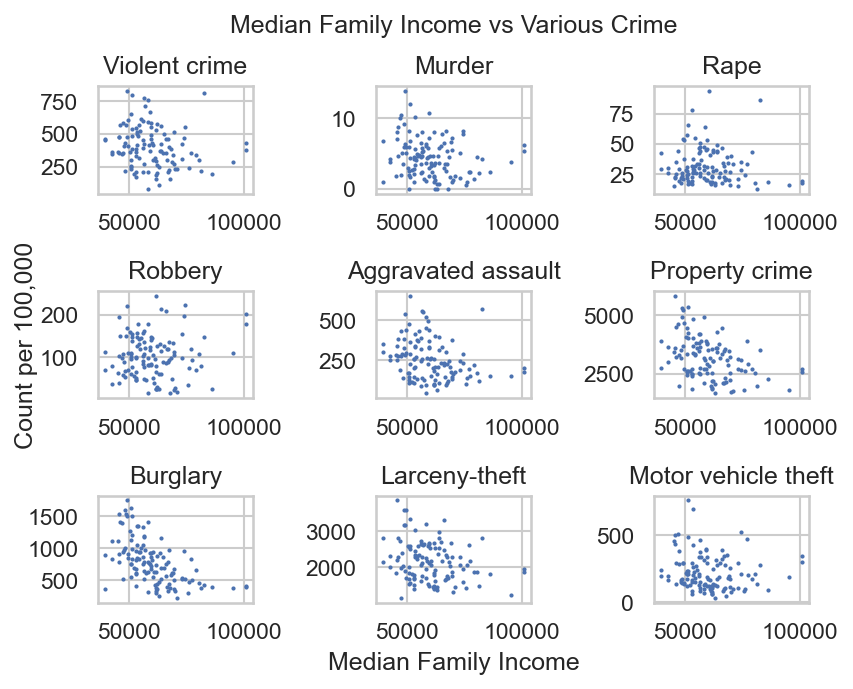

In [20]:
data2010 = data.loc[data['Year'] == 2010, :]
data2010
display(data2010.columns)
#display(data['Metropolitan Statistical Area'].unique())
fig = plt.figure(dpi=150)
crimes = ['Violent crime',
       'Murder', 'Rape', 'Robbery',
       'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft',
       'Motor vehicle theft']
for i in np.arange(0,9):
  ax=fig.add_subplot(3,3,i+1)
  ax.scatter(data2010["Median Family Income"], data2010[crimes[i]], s=1)
  ax.set_title(str(crimes[i]))
axx=fig.add_subplot(1,1,1,frameon=False)
plt.tick_params(labelcolor='none',top=False,bottom=False,left=False,right=False)
plt.grid(False)
plt.ylabel('Count per 100,000')
plt.xlabel('Median Family Income')
fig.tight_layout()
axx.set_title('Median Family Income vs Various Crime', y=1.08)

In [21]:
display(data.columns)
#display(data['Metropolitan Statistical Area'].unique())

Index(['Metropolitan Statistical Area', 'CBSA', 'State', 'Region', 'Year',
       'PM2.5 Weighted Annual Mean', 'O3 4th Maximum', 'Violent crime',
       'Murder', 'Rape', 'Robbery', 'Aggravated assault', 'Property crime',
       'Burglary', 'Larceny-theft', 'Motor vehicle theft',
       'Total Household Income', 'Total Family Income',
       'Median Household Income', 'Median Family Income', 'Total Population',
       'Hispanic', 'White', 'Black', 'Native American', 'Asian',
       'Pacific Islander', 'Other', 'Mixed', 'Minority'],
      dtype='object')

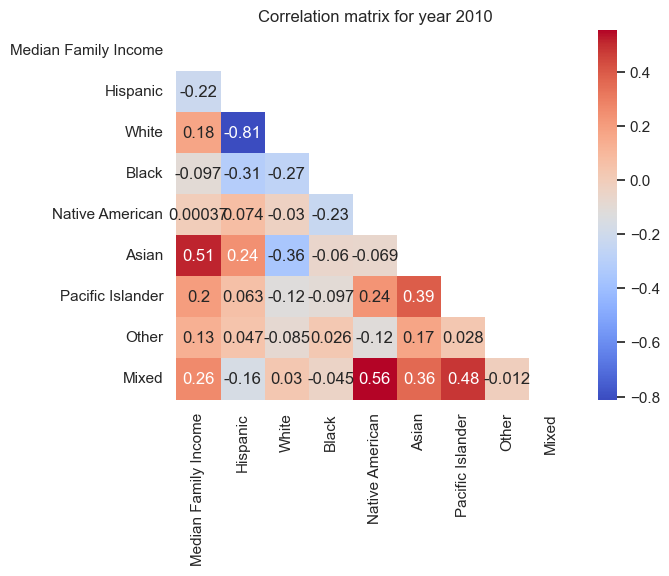

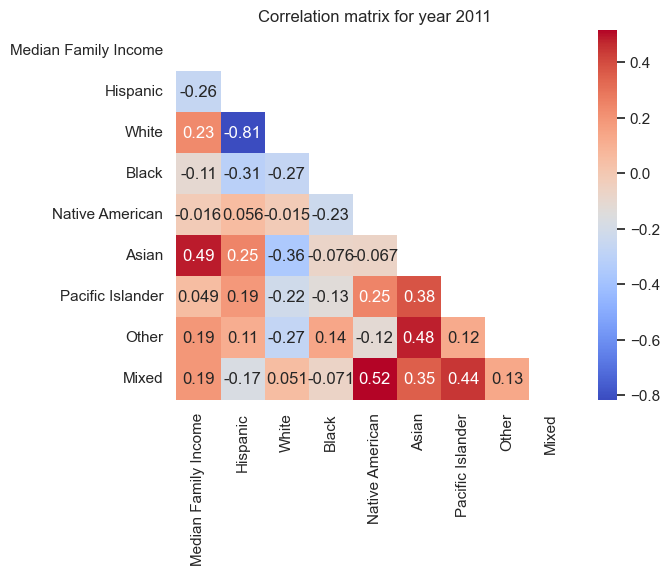

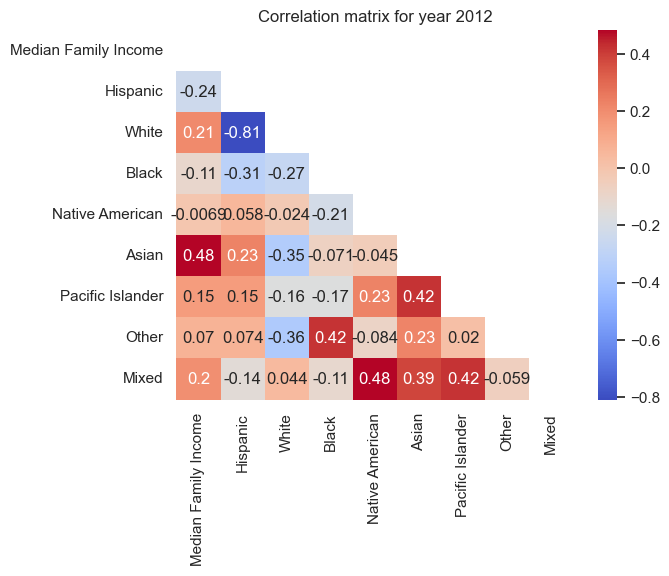

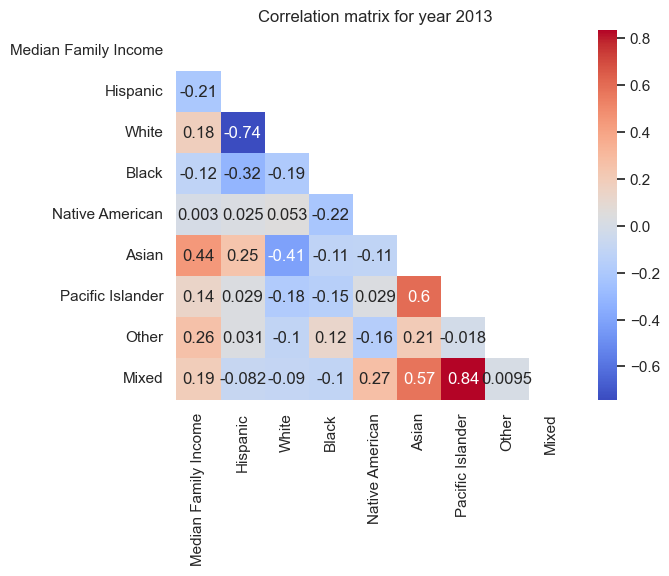

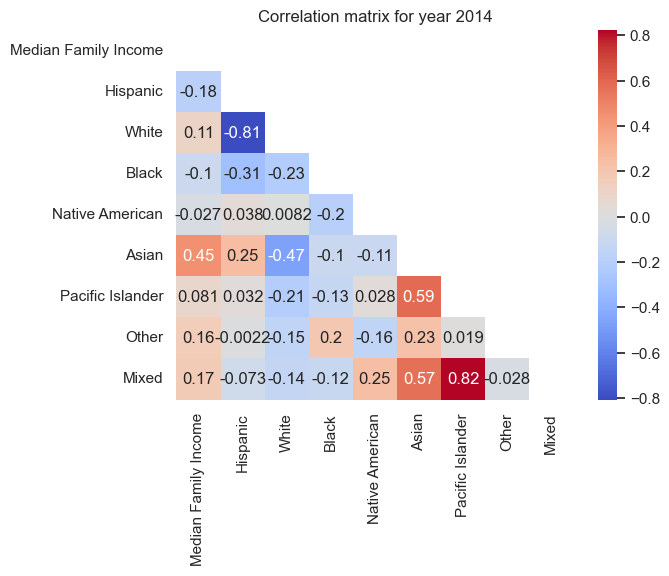

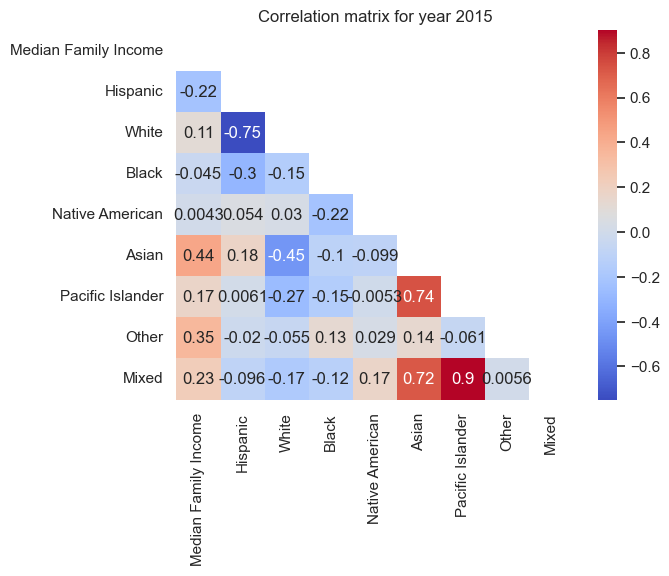

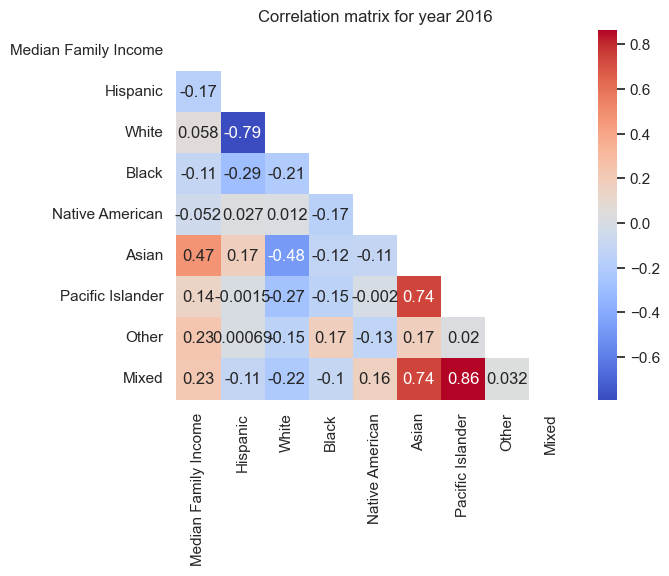

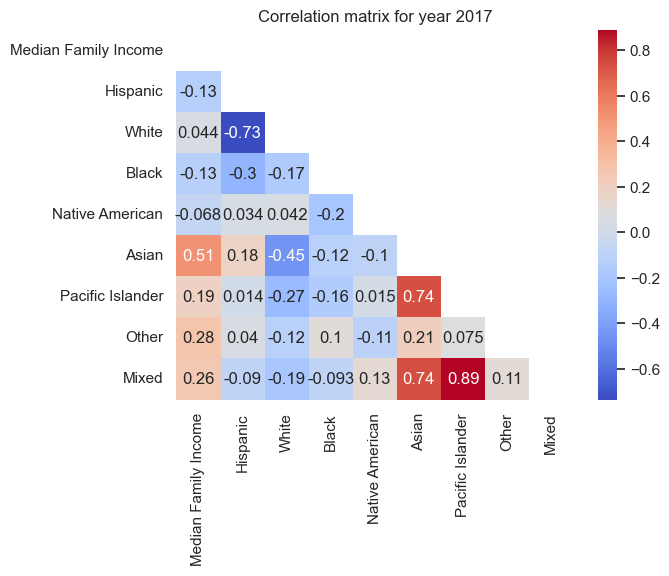

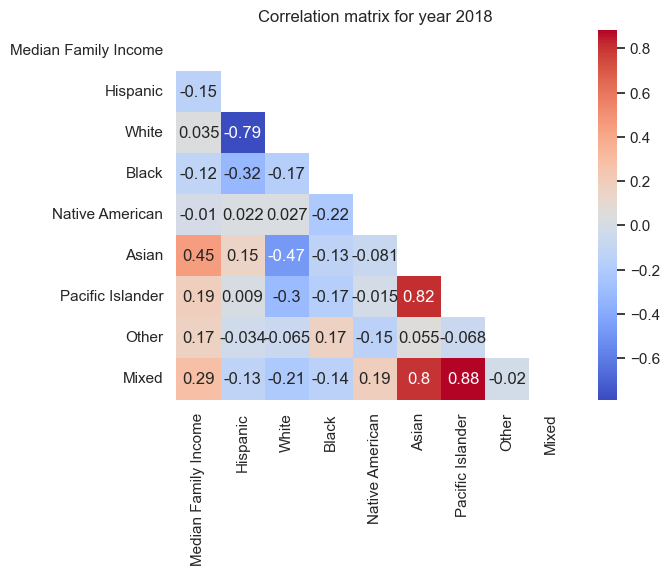

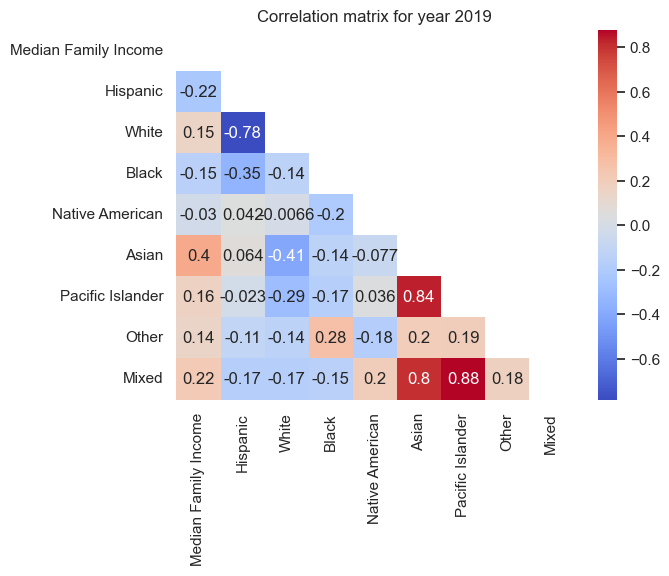

In [22]:
for year in range (2010,2020):
  df_year = data[data['Year'] == year]
  corr_matrix = df_year[['Median Family Income', 'Hispanic', 'White', 'Black', 'Native American', 'Asian', 'Pacific Islander', 'Other', 'Mixed']].corr()
  mask = np.zeros_like(corr_matrix)
  mask[np.triu_indices_from(mask)] = True
  with sns.axes_style("white"):
    plt.figure()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
    plt.title(f"Correlation matrix for year {year}")
    plt.show()

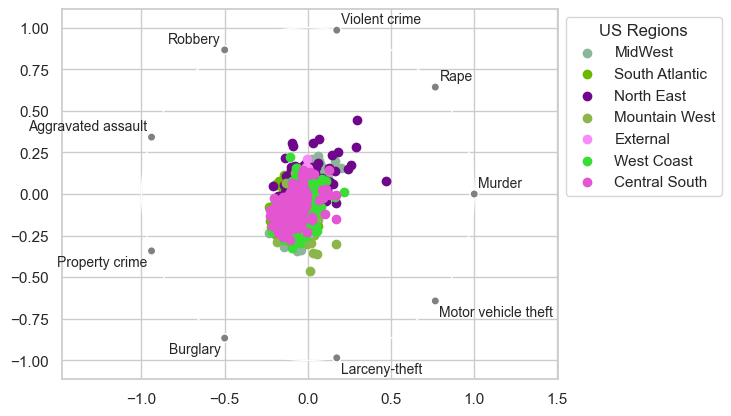

In [23]:
cdata = data[['Region', 'Year', 'Murder', 'Rape', 'Violent crime','Robbery', 
              'Aggravated assault', 'Property crime', 
              'Burglary', 'Larceny-theft', 'Motor vehicle theft']]
for i in cdata.Year.unique():
  for j in cdata.loc[:,(cdata.columns != 'Region')&(cdata.columns != 'Year')].columns:
    cdata.loc[cdata.Year==i,j] = (cdata.loc[cdata.Year==i,j] - cdata.loc[cdata.Year==i,j].mean())/(cdata.loc[cdata.Year==i,j].std())
pd.plotting.radviz(cdata.drop('Year', axis=1), 'Region')
plt.legend(bbox_to_anchor=(1,1), title='US Regions')

In [24]:
cdata.loc[:,(cdata.columns != 'Region')&(cdata.columns != 'Year')] = cdata.loc[:,(cdata.columns != 'Region')&(cdata.columns != 'Year')].replace(np.nan, 0)
u,s,v = np.linalg.svd(cdata.loc[:,(cdata.columns != 'Region')&(cdata.columns != 'Year')])
s

C:\Users\Kevin\AppData\Local\Temp\ipykernel_14032\1289189244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata.loc[:,(cdata.columns != 'Region')&(cdata.columns != 'Year')] = cdata.loc[:,(cdata.columns != 'Region')&(cdata.columns != 'Year')].replace(np.nan, 0)


array([81.9935723 , 38.87077598, 35.96283304, 29.09773519, 25.0347575 ,
       21.75666781, 19.02007099,  4.88926938,  3.91836563])

## Hypothesis Testing of Features

###Air Quality Hypothesis Testing

The null hypothesis is that there is no correlation between air quality and median household income. We are going to test this hypothesis using linear regression models, but let's make sure we can make certain assumptions needed by looking at a z-test of the data.



In [25]:
# create a formula for the test
for i,year in enumerate(years):
  year = year.rename(columns={"Median Household Income": "median_household_income", "PM2.5 Weighted Annual Mean": "pm_WAM"})
  formula = "median_household_income ~ pm_WAM"
  reg = smf.ols(formula=formula, data=year).fit()
  print("201"+str(i)+": " + str(reg.f_pvalue * 100)+"%")

2010: 4.186773119546369%
2011: 2.2635386997756464%
2012: 6.832062529587662%
2013: 8.311304251100221%
2014: 0.9386942162407896%
2015: 5.358166624671307%
2016: 1.8921886469293163%
2017: 2.3658267517388336%
2018: 8.689548624774474%
2019: 1.6367659487183943%


Choosing a p-value of 0.05, which corresponds to 5%, it seems that we can reject there being no correlation between air quality and median household income for only a select few of the years. Lets examine what happens if we do a similar test clumping all of the years data together.

In [26]:
data_aq = data.rename(columns={"Median Household Income": "median_household_income", "PM2.5 Weighted Annual Mean": "pm_WAM"})
formula = "median_household_income ~ pm_WAM"
reg = smf.ols(formula=formula, data=data_aq).fit()
print(str(reg.f_pvalue * 100)+"%")

1.842906850934864e-24%


This is an incredibly small p-value. This would reject the null hypothesis for very extreme p-value tests, but it would definitely seem inuitive to include an interaction term for the year, as it would seem air quality fluctuates with the years, as well as median houehold income. Let's tweak our formula, and see what the results are.

In [27]:
formula = formula = "median_household_income ~ pm_WAM + Year"
reg = smf.ols(formula=formula, data=data_aq).fit()
print(str(reg.f_pvalue * 100)+"%")
reg.summary()

9.957209200862226e-57%


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     median_household_income   R-squared:                       0.179
Model:                                 OLS   Adj. R-squared:                  0.178
Method:                      Least Squares   F-statistic:                     147.6
Date:                     Fri, 12 May 2023   Prob (F-statistic):           9.96e-59
Time:                             18:19:51   Log-Likelihood:                -14513.
No. Observations:                     1356   AIC:                         2.903e+04
Df Residuals:                         1353   BIC:                         2.905e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.871e+06    2.3e+05    -12.467      0.000   -3.32e+06   -2.42e+06
pm_WAM      -915.2945    142.184     -6.437      0.000   -1194.220    -636.369
Year        1456.2138    114.086     12.764      0.000    1232.410    1680.018
==============================================================================
Omnibus:                      249.768   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.106
Skew:                           1.101   Prob(JB):                    6.79e-104
Kurtosis:                       4.886   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Nice, now all of the interaction terms have p-values that are significant. Lets see what the linear regression on this model looks like.

<Axes: ylabel='median_household_income'>

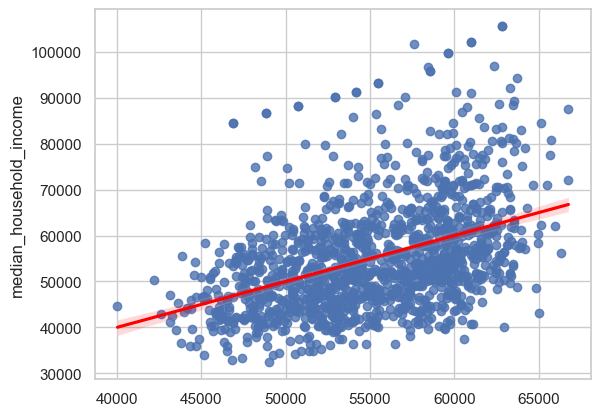

In [28]:
sns.regplot(x=reg.fittedvalues, y=data_aq['median_household_income'], line_kws={'color': 'red'})

### Crime Hypothesis Testing
We need to determine if there is a correlation between crimes and median household income. To do so we will need to do hypothesis testing. Our null hypothesis, the one we want to reject, will be that there is no relationship (correlation) between median household income and crime (Formally, if I increase the amount of crimes, there will be no effect on the median household income). Our alternate hypothesis would be that there is a correlation between median household income and crime. To reject the null hypothesis, we need to create a regression line to find a line that signifies the relationship between the number of crimes and median household income, and check whether our p-value is less than 0.05, which means that that our result is statistically significant. More specifically, it signifies the accuracy of our null hypothesis. The value 0.05 is the alpha level, or the probability we get a false positive, where we say there is a relationship when there is none. Before we get into regression analysis and hypothesis testing, we need to consolidate our data first.

As we can see below, the various crimes are grouped into Violent Crime and Property Crime. Murder, Rape, Robbery and Aggravated Assault values for each row of the table add up to the number under Violent Crime, and same goes for Property Crime. This allows us to reduce the number of variables to 2 instead of 9.

In [29]:
# only getting the crimes, region, year and household income
cdata2 = data.loc[:, ['Region', 'Year', 'Median Household Income', 'Violent crime',
       'Murder', 'Rape', 'Robbery',
       'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft',
       'Motor vehicle theft']]
cdata2.head()

,Region,Year,Median Household Income,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft
1,MidWest,2010,46521,304.7,3.7,40.9,105.1,155.0,3185.6,947.7,2074.5,163.3
2,MidWest,2011,47032,324.1,4.7,37.1,127.9,154.5,3290.8,962.2,2149.3,179.3
3,MidWest,2012,49731,317.5,3.8,39.6,104.4,169.7,3034.9,813.8,2066.1,155.0
4,MidWest,2013,49984,297.2,5.1,38.4,98.8,154.9,2923.1,728.1,2064.1,130.9
5,MidWest,2014,50538,275.1,4.8,44.3,79.4,146.6,NaN,661.9,NaN,124.8


In [30]:
# Taking care of missing values and removing irrelevant crime values
cdata2 = cdata2.fillna(0)
cdata2.loc[cdata2['Violent crime'] == 0, 'Violent crime'] = cdata2.iloc[:, 4:8].sum(axis=1)
cdata2.loc[cdata2['Property crime'] == 0, 'Property crime'] = cdata2.iloc[:, 9:].sum(axis=1)
cdata2 = cdata2.drop(['Murder', 'Rape', 'Robbery', 'Aggravated assault', 'Burglary', 'Larceny-theft', 'Motor vehicle theft'], axis=1)
cdata2.head()

,Region,Year,Median Household Income,Violent crime,Property crime
1,MidWest,2010,46521,304.7,3185.6
2,MidWest,2011,47032,324.1,3290.8
3,MidWest,2012,49731,317.5,3034.9
4,MidWest,2013,49984,297.2,2923.1
5,MidWest,2014,50538,275.1,786.7


In [31]:
formatted_cdata2 = cdata2.rename(columns={'Median Household Income': 'med_hh_inc', 'Violent crime': 'violent_crime', 'Property crime': 'prop_crime'})
formula = 'med_hh_inc ~ violent_crime + prop_crime'
reg = smf.ols(formula=formula, data=formatted_cdata2).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             med_hh_inc   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     106.8
Date:                Fri, 12 May 2023   Prob (F-statistic):           8.57e-44
Time:                        18:19:52   Log-Likelihood:                -14547.
No. Observations:                1356   AIC:                         2.910e+04
Df Residuals:                    1353   BIC:                         2.912e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.77e+04    955.894     70.828      0.000    6.58e+04    6.96e+04
violent_crime     2.4528      2.079      1.180      0.238      -1.625       6.531
prop_crime       -4.9725      0.388    -12.818      0.000      -5.734      -4.212
==============================================================================
Omnibus:                      253.471   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.598
Skew:                           1.119   Prob(JB):                    4.36e-105
Kurtosis:                       4.871   Cond. No.                     9.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The value we want to look at here is the Prob (F-statistic), which is our p-value. As we can see, our p-value is a lot less than 0.05, which means that the number of crimes is statistically significant (has a noticeable effect) on the median household income. This means we can keep the number of crimes as variables (features) when we calculate a regression line with the other significant variables.

## Feature Importance

In [32]:
df_all = data.rename(columns={"Median Household Income": "median_household_income", "PM2.5 Weighted Annual Mean": "pm_WAM",
                             "Total Population": "population", "Violent crime": "violent_crime",
                             "Aggravated assault": "aggravated_assault", "Property crime": "property_crime",
                             "Motor vehicle theft": "vehicle_theft", "Larceny-theft":"Larceny_theft"})
df_all['Year'] = df_all['Year'].astype(int)
formula = "median_household_income ~ pm_WAM + Year + Region + Minority + White + population + violent_crime + aggravated_assault + property_crime + vehicle_theft + Burglary + Larceny_theft + Murder + Rape + Robbery"
reg = smf.ols(formula=formula, data=df_all).fit()
print(str(reg.f_pvalue * 100)+"%")
reg.summary()

3.280166317552622e-213%


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     median_household_income   R-squared:                       0.581
Model:                                 OLS   Adj. R-squared:                  0.574
Method:                      Least Squares   F-statistic:                     85.12
Date:                     Fri, 12 May 2023   Prob (F-statistic):          3.28e-215
Time:                             18:19:52   Log-Likelihood:                -12932.
No. Observations:                     1249   AIC:                         2.591e+04
Df Residuals:                         1228   BIC:                         2.601e+04
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.545e+06   2.21e+05     -6.996      0.000   -1.98e+06   -1.11e+06
Region[T.External]        1.659e+04   2071.361      8.011      0.000    1.25e+04    2.07e+04
Region[T.MidWest]         -874.3352    862.874     -1.013      0.311   -2567.206     818.536
Region[T.Mountain West]   1088.9055   1107.624      0.983      0.326   -1084.139    3261.950
Region[T.North East]       416.6513   1008.421      0.413      0.680   -1561.768    2395.070
Region[T.South Atlantic]  -423.6824    761.060     -0.557      0.578   -1916.805    1069.440
Region[T.West Coast]      4182.5886   1116.740      3.745      0.000    1991.659    6373.518
pm_WAM                    -746.5992    120.423     -6.200      0.000    -982.856    -510.342
Year                       799.0745    109.372      7.306      0.000     584.497    1013.652
Minority                  1299.2627   4728.090      0.275      0.784   -7976.766    1.06e+04
White                     3069.3063   4567.430      0.672      0.502   -5891.525     1.2e+04
population                   0.0010      0.000      7.397      0.000       0.001       0.001
violent_crime             2595.0681   3388.402      0.766      0.444   -4052.630    9242.767
aggravated_assault       -2614.9855   3388.420     -0.772      0.440   -9262.718    4032.747
property_crime            2714.4898   3729.287      0.728      0.467   -4601.989       1e+04
vehicle_theft            -2709.0037   3729.102     -0.726      0.468      -1e+04    4607.113
Burglary                 -2732.0587   3729.325     -0.733      0.464      -1e+04    4584.495
Larceny_theft            -2714.2914   3729.290     -0.728      0.467      -1e+04    4602.195
Murder                   -3045.8873   3391.898     -0.898      0.369   -9700.443    3608.669
Rape                     -2581.7565   3387.708     -0.762      0.446   -9228.093    4064.580
Robbery                  -2511.6342   3388.604     -0.741      0.459   -9159.729    4136.460
==============================================================================
Omnibus:                      133.824   Durbin-Watson:                   0.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.507
Skew:                           0.730   Prob(JB):                     2.93e-49
Kurtosis:                       4.471   Cond. No.                     2.26e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

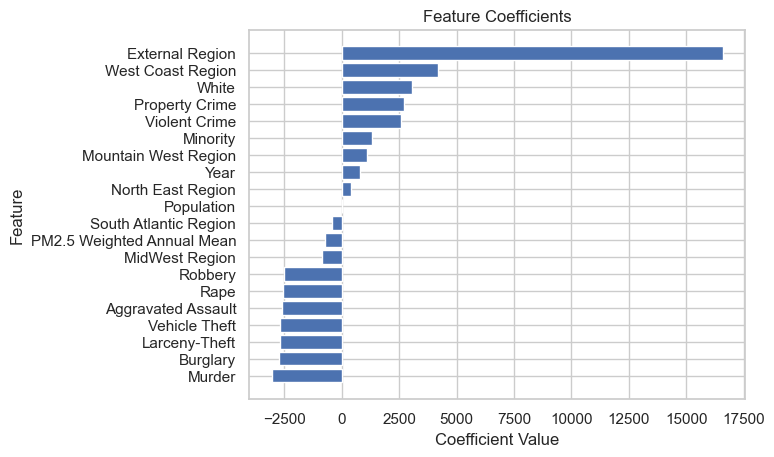

In [33]:
coefs = reg.params.sort_values()
coefs = coefs.drop('Intercept')
labels = {'Larceny_theft': 'Larceny-Theft', 'vehicle_theft': 'Vehicle Theft',
       'aggravated_assault': 'Aggravated Assault', 'Region[T.MidWest]': 'MidWest Region', 'pm_WAM': 'PM2.5 Weighted Annual Mean',
       'Region[T.South Atlantic]': 'South Atlantic Region', 'population': 'Population', 'Region[T.North East]': 'North East Region', 
       'Region[T.Mountain West]': 'Mountain West Region', 'violent_crime': 'Violent Crime',
       'property_crime': 'Property Crime', 'Region[T.West Coast]': 'West Coast Region','Region[T.External]': 'External Region'}
coefs = coefs.rename(labels)
fig, ax = plt.subplots()
ax.barh(y=coefs.index, width=coefs.values)
ax.set_xlabel('Coefficient Value')
ax.set_ylabel('Feature')
ax.set_title('Feature Coefficients')
plt.show()

## Diversity Stuff below

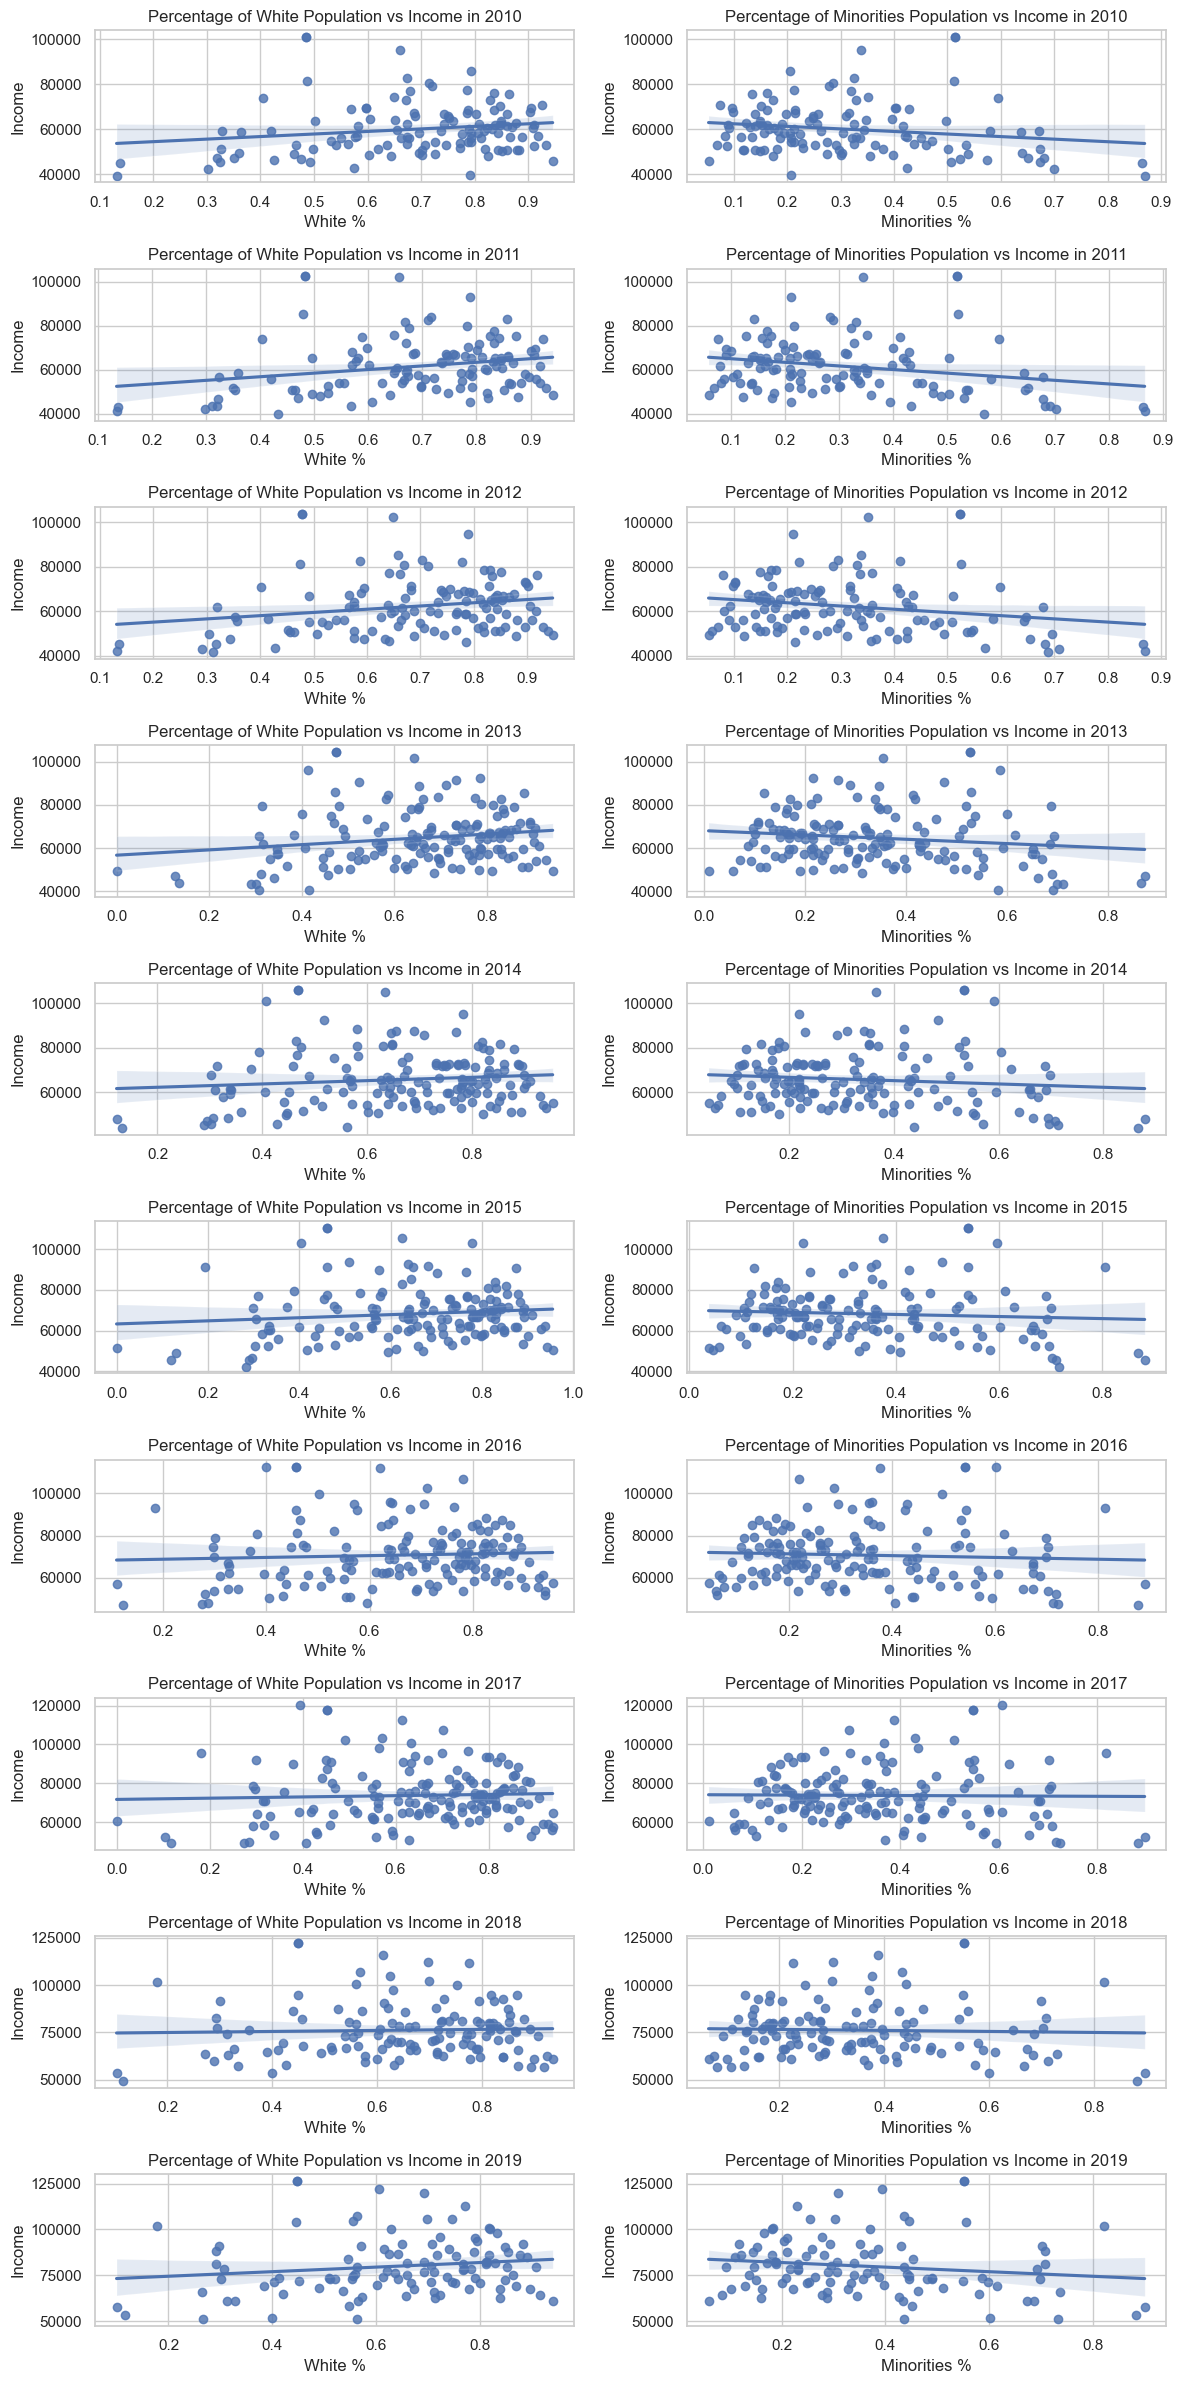

In [38]:
races = ['White', 'Minorities']
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(12, 24))
data.head()
data = data.rename(columns={'Minority': 'Minorities'})
for i, year in enumerate(range(2010, 2020)):
    for j, race in enumerate(races):
        ax = axes[i, j]
        sns.regplot(data=data[data['Year'] == year], x=race, y='Median Family Income', ax=ax)
        ax.set_title(f"Percentage of {race} Population vs Income in {year}")
        ax.set_xlabel(race + ' %')
        ax.set_ylabel('Income')

plt.tight_layout()
plt.show()